## Imports

In [4]:
from collections import namedtuple, defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300



Result = namedtuple('Result', ['partisans', "sims"])
Sim = namedtuple("Sim", ["asymptotic", "non_partisans_mean"])

In [5]:
PARTISAN_BIAS = 0.3
TRUE_BIAS = 0.6

## m = 3

In [1]:
#   1000 run/f but taking mean per sim 
#  import json
# Dwell = namedtuple("Dwell", ["n", "mean", "stdev"])
# # results_by_partisan[0.01] = [ aggdwells dist 0,  aggdwells dist 1, ... ]


# with open("output/bigexperiment-2023_02_23-00_39_03.log", 'r') as f:
#     max_distances = max(len(json.loads(line)['d']) for line in f)
#     results_by_partisan = defaultdict(lambda: [[] for x in range(max_distances)])

# rows = []
# with open("output/bigexperiment-2023_02_23-00_39_03.log", 'r') as f:
#     for line in f:
#         d = json.loads(line)

#         for dist, (n, mean, stdev) in enumerate(d['d']):
#             rows.append(dict(partisans= d['p'], dist= dist, n= n, mean= mean, stdev= stdev))
#             results_by_partisan[d['p']][dist].append(Dwell(n, mean, stdev))

# df = pd.DataFrame(rows)

In [2]:
cd ..

/Users/buyutong/Desktop/Unimelb/Masters/Projects/code_tracy


In [6]:
import json
Dwell = namedtuple("Dwell", ["n", "d"])
# results_by_partisan[0.01] = [ aggdwells dist 0,  aggdwells dist 1, ... ]


with open("output/bigexperiment-2023_04_01-13_13_52.log", 'r') as f:
    max_distances = max(len(json.loads(line)['d']) for line in f)
    results_by_partisan = defaultdict(lambda: [[] for x in range(max_distances)])

rows = []
with open("output/bigexperiment-2023_04_01-13_13_52.log", 'r') as f:
    for line in f:
        data = json.loads(line)
        for dist, (n, d) in enumerate(data['d']):
            for dwell in d:
                rows.append(dict(partisans= data['p'], dist= dist, n= n, d= dwell))

        #     rows.append(dict(partisans= data['p'], dist= dist, n= n, d=d))
        #     results_by_partisan[data['p']][dist].append(Dwell(n, d))

df = pd.DataFrame(rows)

In [7]:
df.groupby('partisans')

In [9]:
df[df.dist ==3].tail(20)

,partisans,dist,n,d
83774665,0.46,3,1,8
83774666,0.46,3,1,8
83774667,0.46,3,1,2
83774668,0.46,3,1,1
83774669,0.46,3,1,2
83774670,0.46,3,1,4
83774671,0.46,3,1,2
83774672,0.46,3,1,1
83774673,0.46,3,1,1
83774674,0.46,3,1,1


In [ ]:
def find_min_max(x):
    return min(x), max(x) 

In [ ]:
# df.groupby(["partisans", 'dist']).sum().n.reset_index()

In [ ]:
df_dist_1 = df[df.dist == 1]
df_dist_2 = df[df.dist == 2]
df_dist_3 = df[df.dist == 3]
df_dist_4 = df[df.dist == 4]


In [ ]:
df_dist_1.describe()

,partisans,dist,n,d
count,5.046855e+07,50468547.0,5.046855e+07,5.046855e+07
mean,3.835273e-01,1.0,4.335708e+01,1.874807e+01
std,2.161325e-01,0.0,1.219169e+01,2.946214e+02
min,1.000000e-02,1.0,1.000000e+00,1.000000e+00
25%,1.900000e-01,1.0,3.600000e+01,1.000000e+00
50%,3.900000e-01,1.0,4.600000e+01,2.000000e+00
75%,5.600000e-01,1.0,5.300000e+01,6.000000e+00
max,9.900000e-01,1.0,7.100000e+01,9.994000e+03


In [ ]:
df_dist_1[df_dist_1.d > 9900].sort_values("partisans")

,partisans,dist,n,d
27668624,0.06,1,30,9972
37908409,0.09,1,44,9987
40975577,0.10,1,35,9989
41044387,0.10,1,42,9951
42693326,0.10,1,42,9949
...,...,...,...,...
104846913,0.99,1,1,9983
104846813,0.99,1,1,9971
104846713,0.99,1,1,9910
104847744,0.99,1,1,9957


KeyboardInterrupt: 

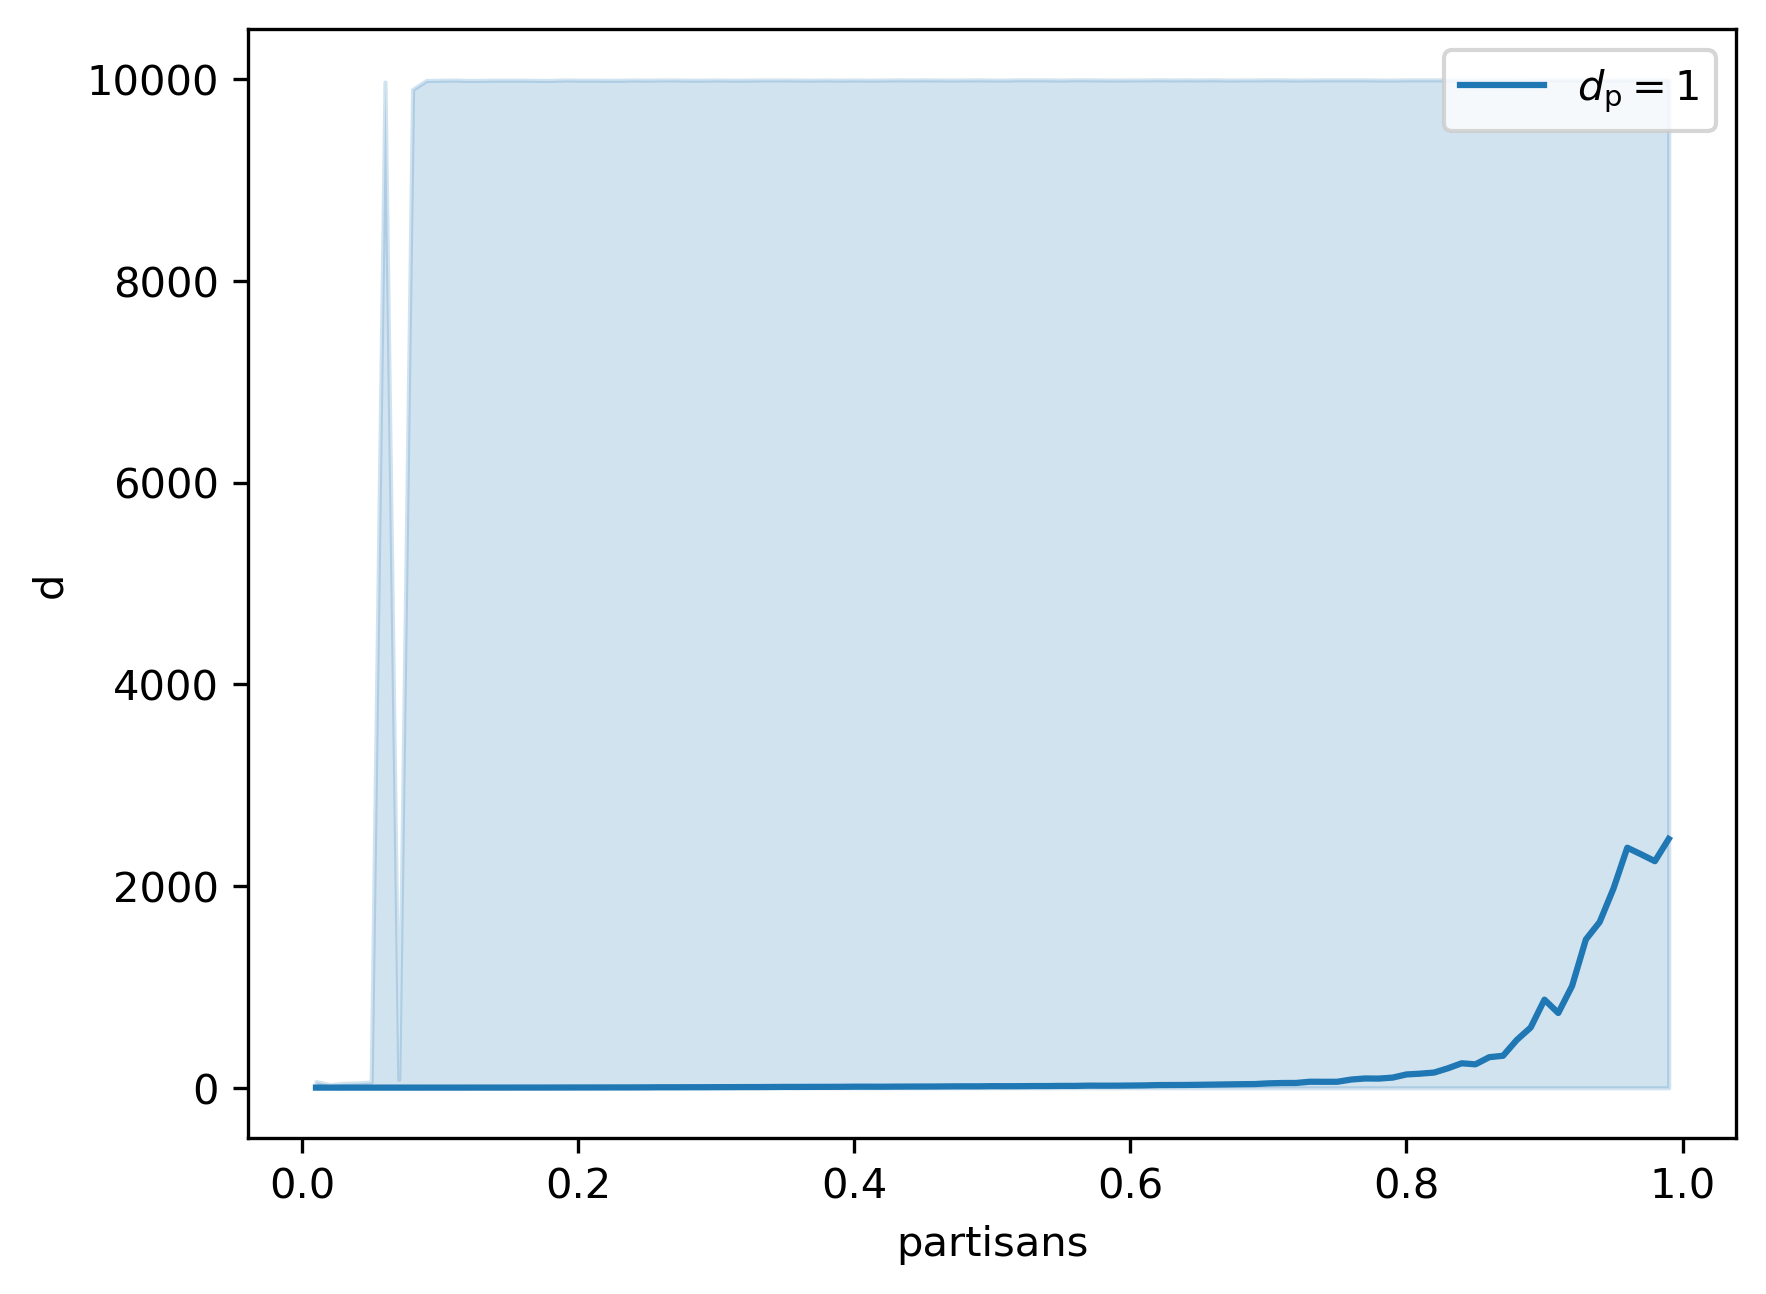

In [ ]:
sns.lineplot(df_dist_1, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 1$")
sns.lineplot(df_dist_2, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 2$")
sns.lineplot(df_dist_3, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 3$")
sns.lineplot(df_dist_4, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 4$")
plt.legend()
plt.xlabel("$f$")
plt.ylabel("$\\langle t_{\\rm d} \\rangle$")
plt.yscale("log")
# plt.xscale("log")



(0.01, 0.1)

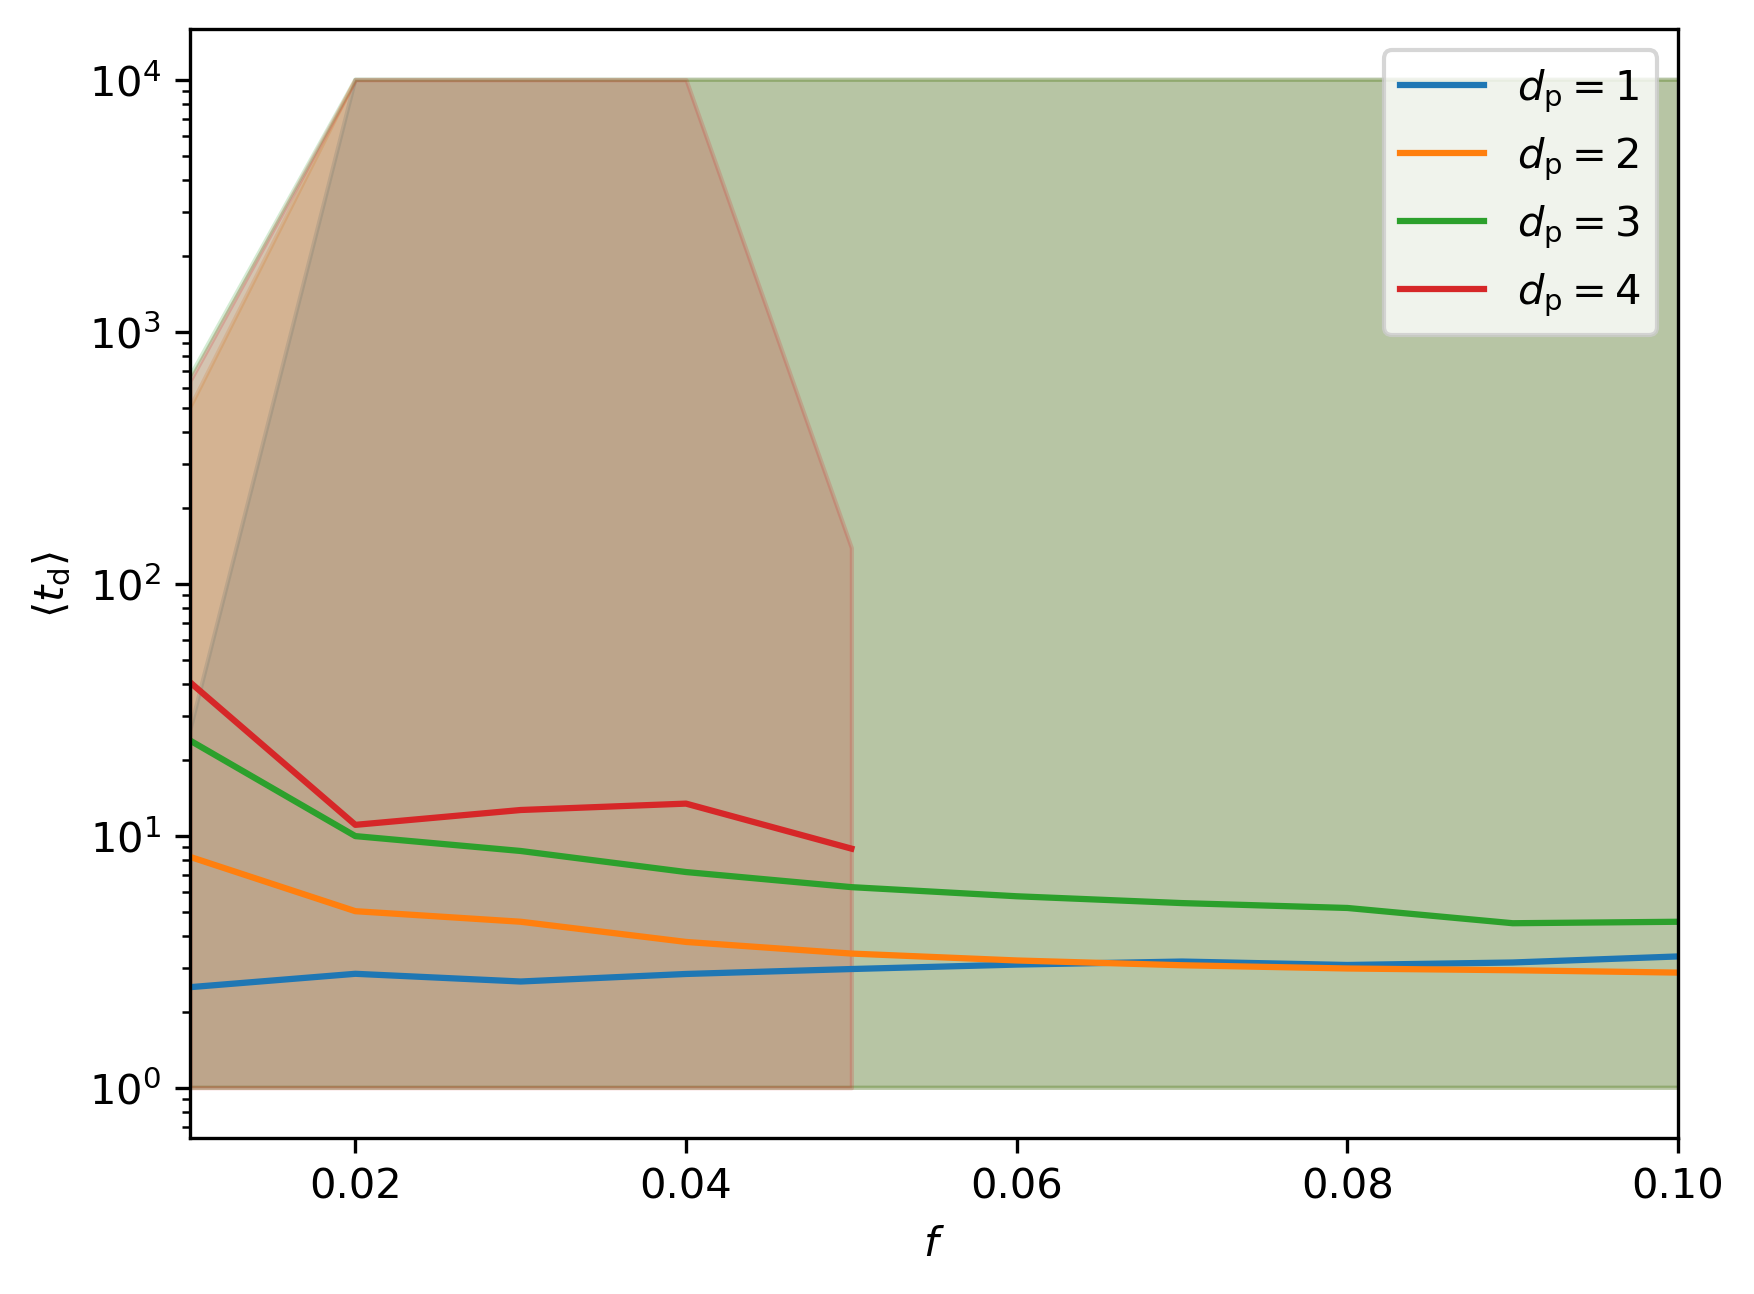

In [ ]:
sns.lineplot(df_dist_1, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 1$")
sns.lineplot(df_dist_2, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 2$")
sns.lineplot(df_dist_3, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 3$")
sns.lineplot(df_dist_4, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 4$")
plt.legend()
plt.xlabel("$f$")
plt.ylabel("$\\langle t_{\\rm d} \\rangle$")
plt.yscale("log")
# plt.xscale("log")

plt.xlim(0.01, 0.1)

,partisans,dist,n,d
19428,0.01,2,75,1
1676073,0.01,2,46,1
4655323,0.01,2,77,1
1676082,0.01,2,46,1
4655320,0.01,2,77,1
...,...,...,...,...
6088742,0.01,2,79,413
6081024,0.01,2,79,413
6087142,0.01,2,79,413
6095178,0.01,2,79,413


# m = 20

In [ ]:
# import json
# Dwell = namedtuple("Dwell", ["n", "mean", "stdev"])
# # results_by_partisan[0.01] = [ aggdwells dist 0,  aggdwells dist 1, ... ]


# with open("output/bigexperiment-2023_02_25-20_46_34.log", 'r') as f:
#     max_distances = max(len(json.loads(line)['d']) for line in f)
#     results_by_partisan = defaultdict(lambda: [[] for x in range(max_distances)])

# rows = []
# with open("output/bigexperiment-2023_02_25-20_46_34.log", 'r') as f:
#     for line in f:
#         d = json.loads(line)

#         for dist, (n, mean, stdev) in enumerate(d['d']):
#             rows.append(dict(partisans= d['p'], dist= dist, n= n, mean= mean, stdev= stdev))
#             results_by_partisan[d['p']][dist].append(Dwell(n, mean, stdev))

# df = pd.DataFrame(rows)

In [ ]:
import json
Dwell = namedtuple("Dwell", ["n", "d"])
# results_by_partisan[0.01] = [ aggdwells dist 0,  aggdwells dist 1, ... ]


with open("output/bigexperiment-2023_04_01-16_49_47.log", 'r') as f:
    max_distances = max(len(json.loads(line)['d']) for line in f)
    results_by_partisan = defaultdict(lambda: [[] for x in range(max_distances)])

rows = []
with open("output/bigexperiment-2023_04_01-16_49_47.log", 'r') as f:
    for line in f:
        data = json.loads(line)
        for dist, (n, d) in enumerate(data['d']):
            # n: number of agents with distance d
            for dwell in d:
                rows.append(dict(partisans= data['p'], dist= dist, n= n, d= dwell))

        #     rows.append(dict(partisans= data['p'], dist= dist, n= n, d=d))
        #     results_by_partisan[data['p']][dist].append(Dwell(n, d))

df = pd.DataFrame(rows)

In [ ]:
df.groupby('partisans')

In [ ]:
df_dist_1 = df[df.dist == 1]
df_dist_2 = df[df.dist == 2]
df_dist_3 = df[df.dist == 3]
df_dist_4 = df[df.dist == 4]

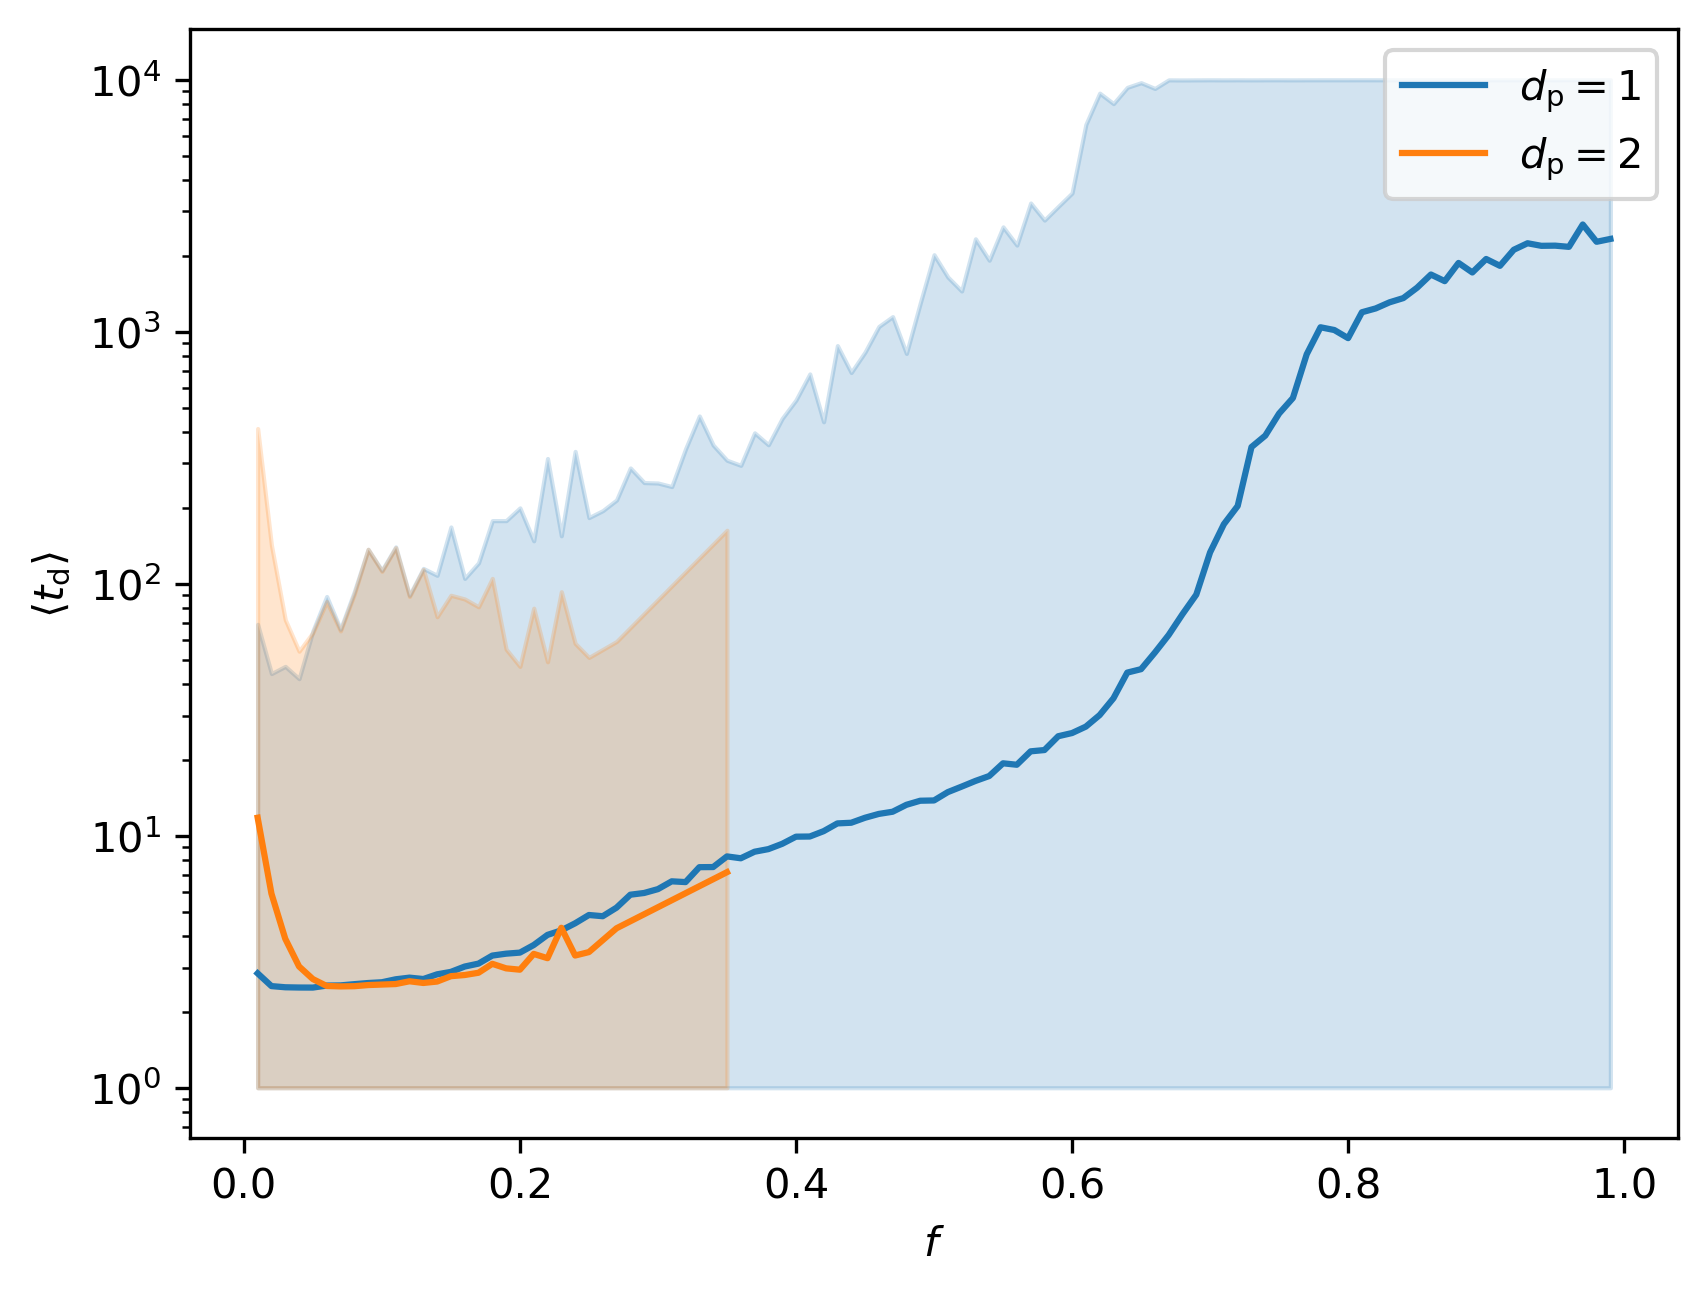

In [ ]:
sns.lineplot(df_dist_1, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 1$")
sns.lineplot(df_dist_2, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 2$")
sns.lineplot(df_dist_3, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 3$")
sns.lineplot(df_dist_4, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 4$")
plt.legend()
plt.xlabel("$f$")
plt.ylabel("$\\langle t_{\\rm d} \\rangle$")
plt.yscale("log")
# plt.xscale("log")



In [ ]:
df["dist"].value_counts()


0    99000
1    99000
2     9820
Name: dist, dtype: int64

# Dwell Belief

In [26]:
cd code_tracy

/Users/buyutong/Desktop/Unimelb/Masters/Projects/code_tracy


In [27]:
import scipy as sp
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 300

from src.simulation.sim import *
from src.analyse.analyse import *
import pandas as pd
import powerlaw as pl
import plotly.io as pio
from scipy.optimize import curve_fit
pio.renderers.default = 'notebook_connected'
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple, defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300


Result = namedtuple('Result', ['partisans', "sims"])
Sim = namedtuple("Sim", ["distance", "dwell_time", "mean_belief"])


(ipykernel_launcher.py:1780): Gtk-WARNING **: 10:59:14.274: Locale not supported by C library.
	Using the fallback 'C' locale.


In [28]:
rows = []
with open("output/bigexperiment-2023_03_31-14_27_13.log", 'r') as f:
    for line in f:
        data = json.loads(line)
        for dist, (n, d) in enumerate(data['d']):
            for (dwell, bias) in d:
                rows.append(dict(partisans= data['p'], dist= dist, n= n, d= dwell, b=bias))

In [29]:
df_tot = pd.DataFrame(rows)


In [30]:
df_tot

,partisans,dist,n,d,b
0,0.02,0,2,10000,0.300000
1,0.02,0,2,10000,0.300000
2,0.02,1,6,2,0.590208
3,0.02,1,6,1,0.590147
4,0.02,1,6,5,0.592323
...,...,...,...,...,...
8605639,0.90,1,10,1,0.306206
8605640,0.90,1,10,7783,0.300000
8605641,0.90,1,10,16,0.308634
8605642,0.90,1,10,2,0.306617


In [31]:
df_tot[(df_tot.dist > 0) & (df_tot.d > 9900)].describe()

,partisans,dist,n,d,b
count,1083.000000,1083.0,1083.000000,1083.000000,1.083000e+03
mean,0.781810,1.0,21.363804,9966.014774,3.000001e-01
std,0.147911,0.0,14.155874,22.584443,5.471944e-08
min,0.100000,1.0,10.000000,9901.000000,3.000000e-01
25%,0.600000,1.0,10.000000,9953.500000,3.000000e-01
50%,0.900000,1.0,10.000000,9975.000000,3.000001e-01
75%,0.900000,1.0,39.000000,9983.000000,3.000001e-01
max,0.900000,1.0,41.000000,9993.000000,3.000002e-01


In [32]:
df_002 = df_tot[df_tot.partisans == 0.02]

In [33]:
df_002[df_002.dist > 1].sort_values("d").describe()

,partisans,dist,n,d,b
count,4.572552e+06,4.572552e+06,4.572552e+06,4.572552e+06,4.572552e+06
mean,2.000000e-02,2.326321e+00,4.781350e+01,9.010425e+00,5.962541e-01
std,2.671474e-16,4.826502e-01,1.220807e+01,1.472131e+01,1.066641e-02
min,2.000000e-02,2.000000e+00,1.000000e+00,1.000000e+00,3.029869e-01
25%,2.000000e-02,2.000000e+00,3.900000e+01,1.000000e+00,5.957777e-01
50%,2.000000e-02,2.000000e+00,5.000000e+01,4.000000e+00,5.965230e-01
75%,2.000000e-02,3.000000e+00,5.600000e+01,1.000000e+01,5.971305e-01
max,2.000000e-02,4.000000e+00,7.400000e+01,3.710000e+02,6.544918e-01


In [34]:
df_002[df_002.dist ==4].describe()

,partisans,dist,n,d,b
count,29986.00,29986.0,29986.000000,29986.000000,29986.000000
mean,0.02,4.0,4.970753,27.504402,0.596283
std,0.00,0.0,4.066831,38.614916,0.008211
min,0.02,4.0,1.000000,1.000000,0.303106
25%,0.02,4.0,3.000000,2.000000,0.595271
50%,0.02,4.0,4.000000,11.000000,0.596150
75%,0.02,4.0,5.000000,38.000000,0.596763
max,0.02,4.0,14.000000,345.000000,0.654492


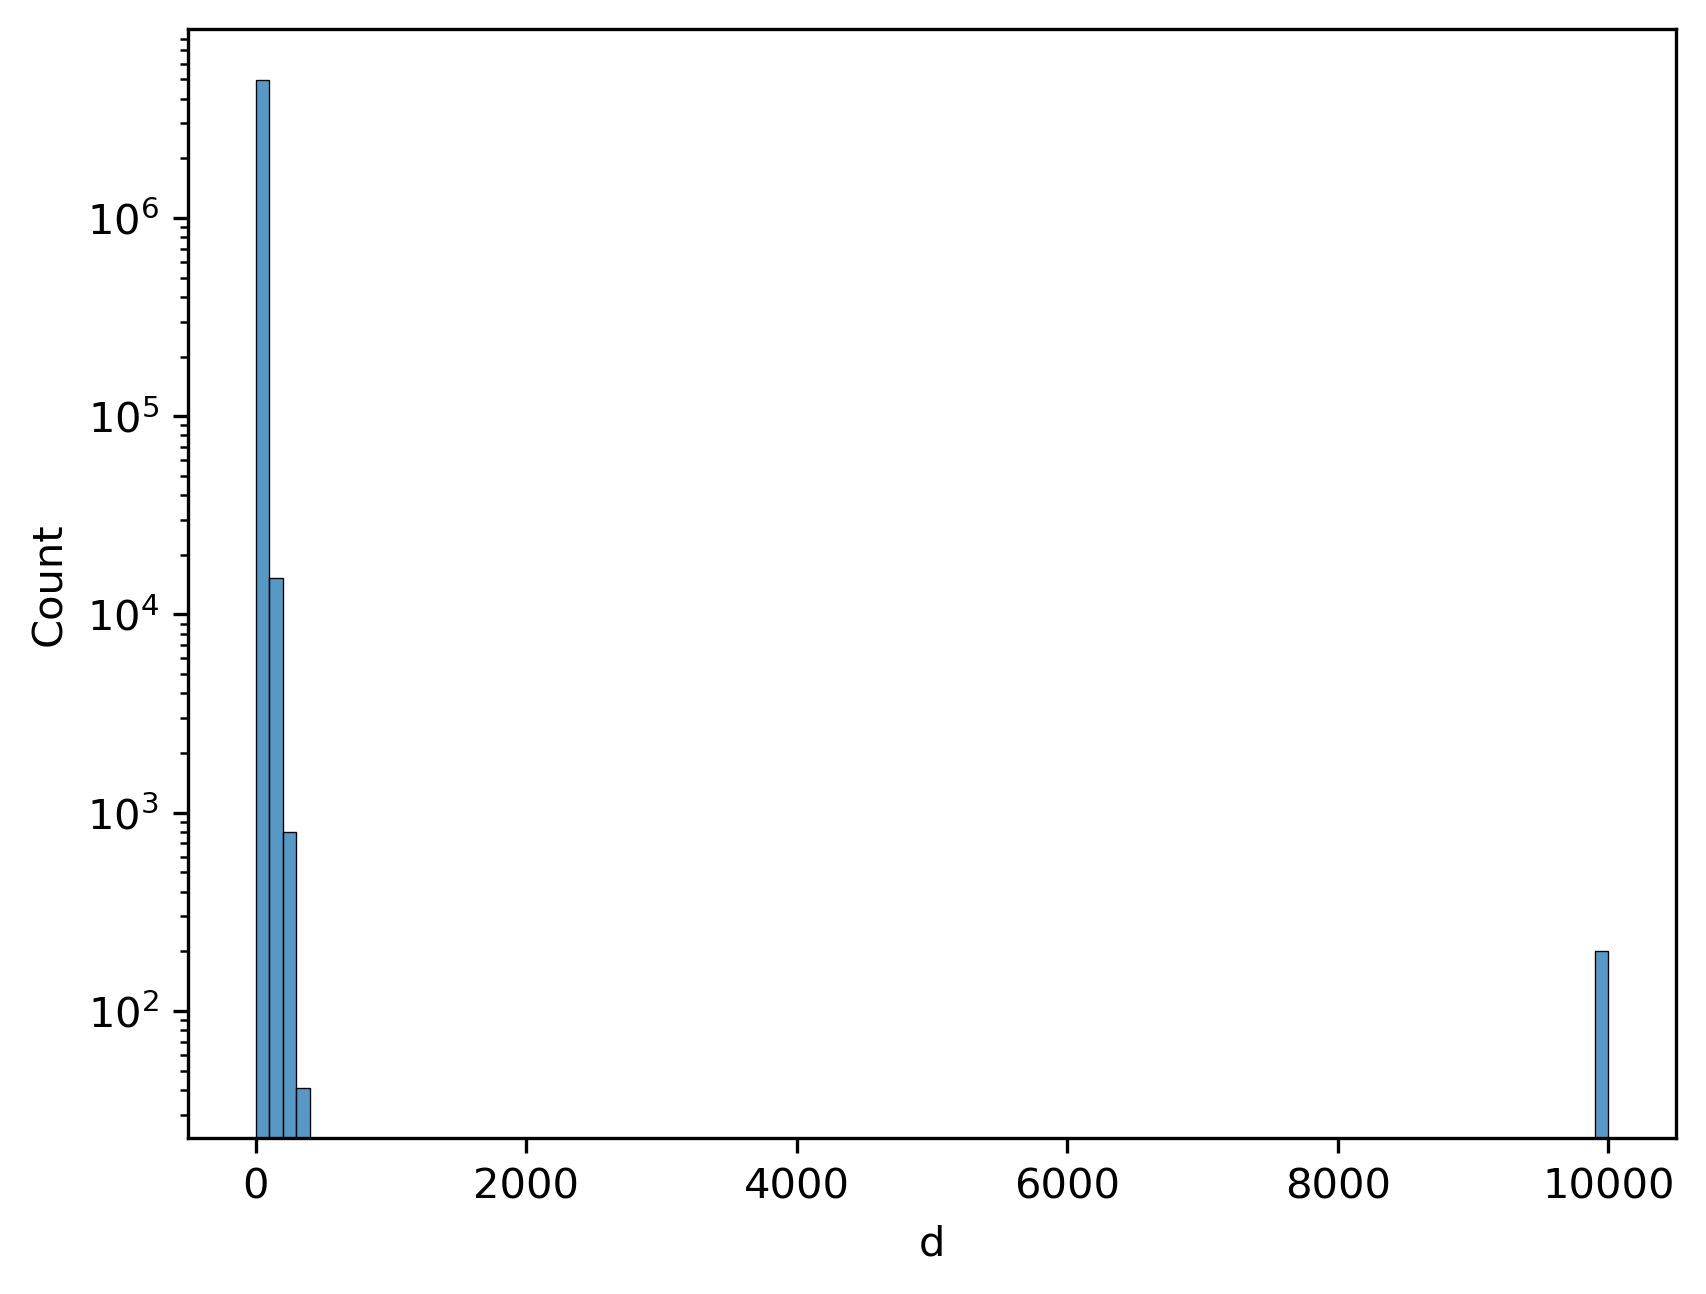

In [35]:
sns.histplot(df_002, x = "d",bins=100)
plt.yscale("log")

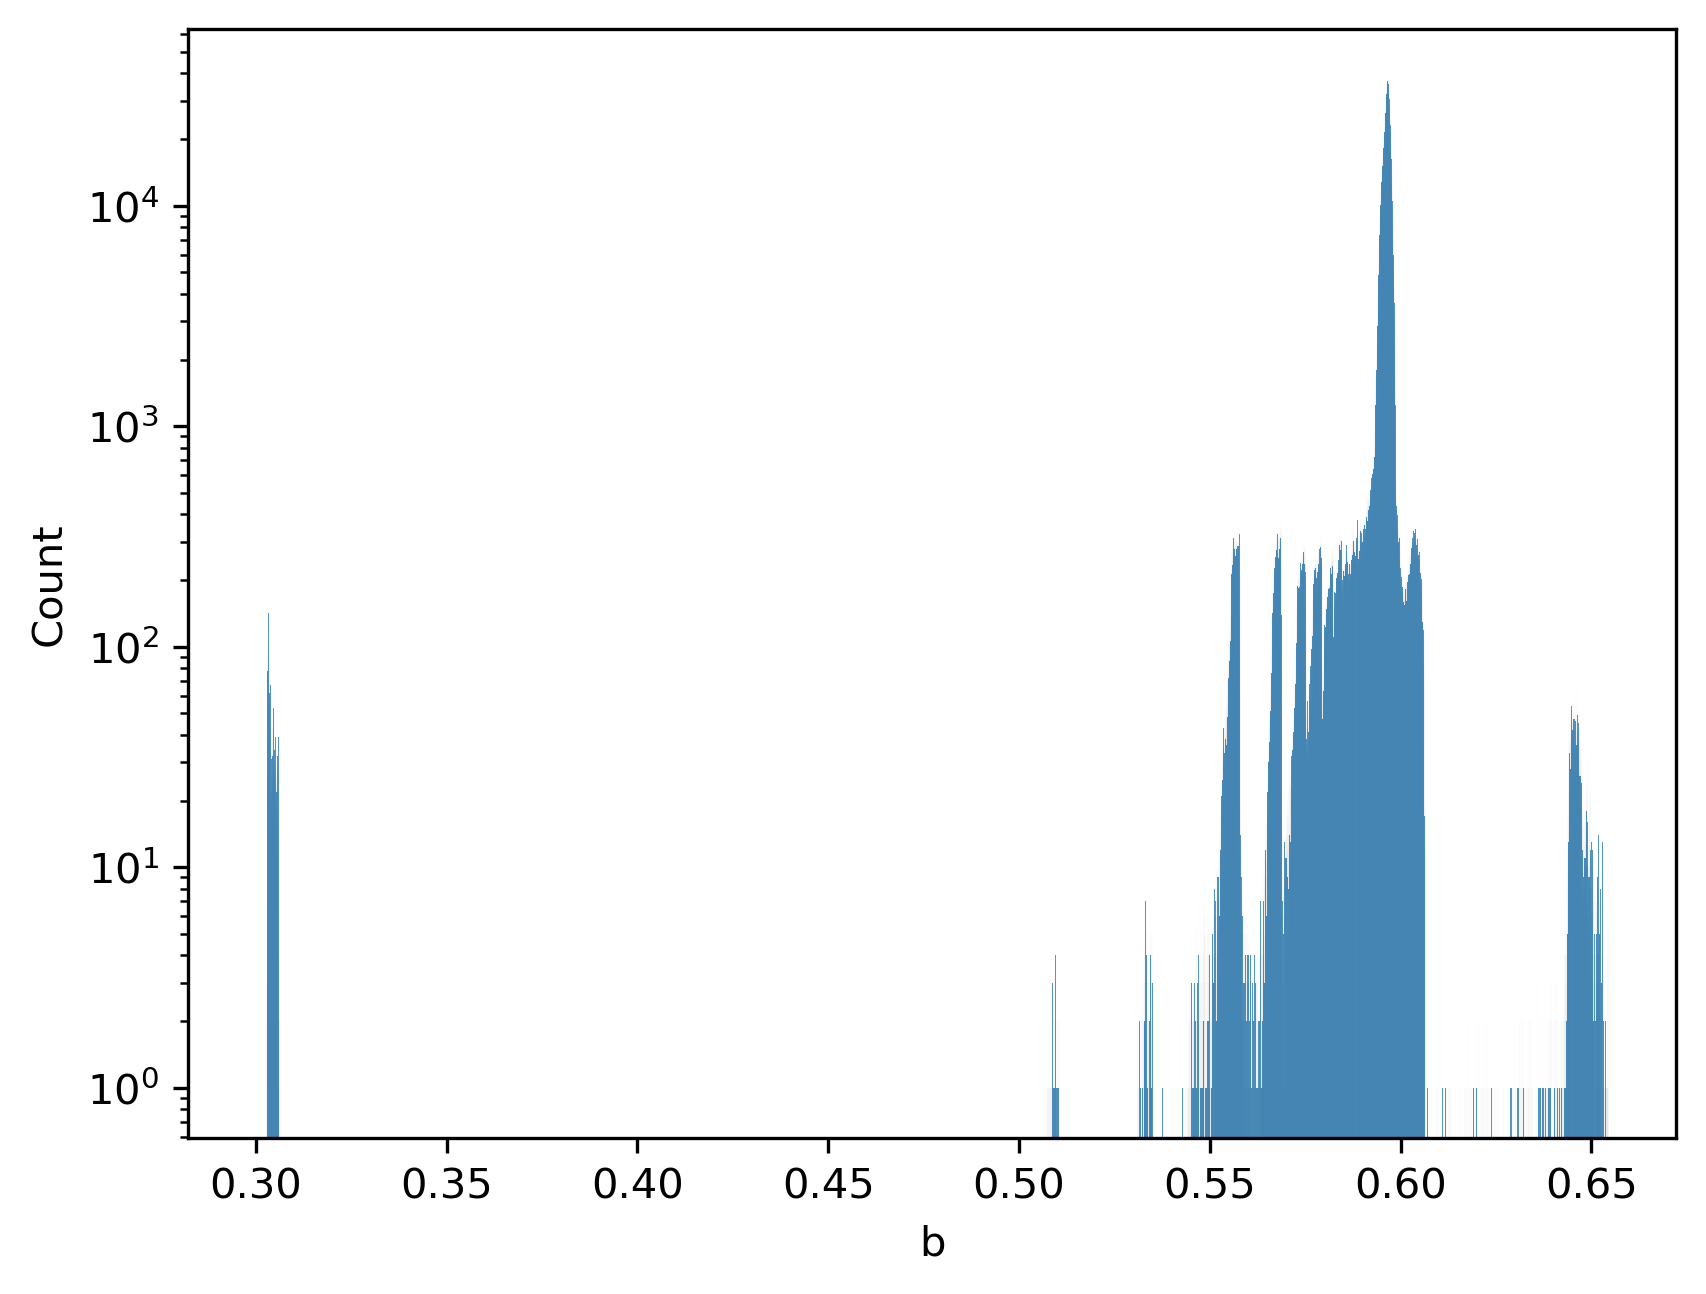

In [36]:
sns.histplot(df_002, x = "b")
plt.yscale("log")

# plt.xscale("log")

In [37]:
def hist_plot(df, frac, palette="BuPu", multiple="stack"):
    df_002 = df[df.partisans == frac]   
    sns.histplot(df_002[df_002.dist >0], x='b', weights="d",stat="probability", binwidth=0.01, element="bars", label = "Dwell time steps", fill = True, linewidth=1, hue = "dist", palette=palette, multiple= multiple)
    # sns.histplot(df_002[df_002.dist >0],x='b', stat="probability", binwidth=0.01, element="bars", label = "Dwell time interval", fill = False, color= "orange")
    plt.yscale("log")
    plt.ylabel(" Normalized number ")
    plt.xlabel("$\\langle \\theta \\rangle$")


In [38]:
#b3cde3
#8c96c6
#8856a7
#810f7c

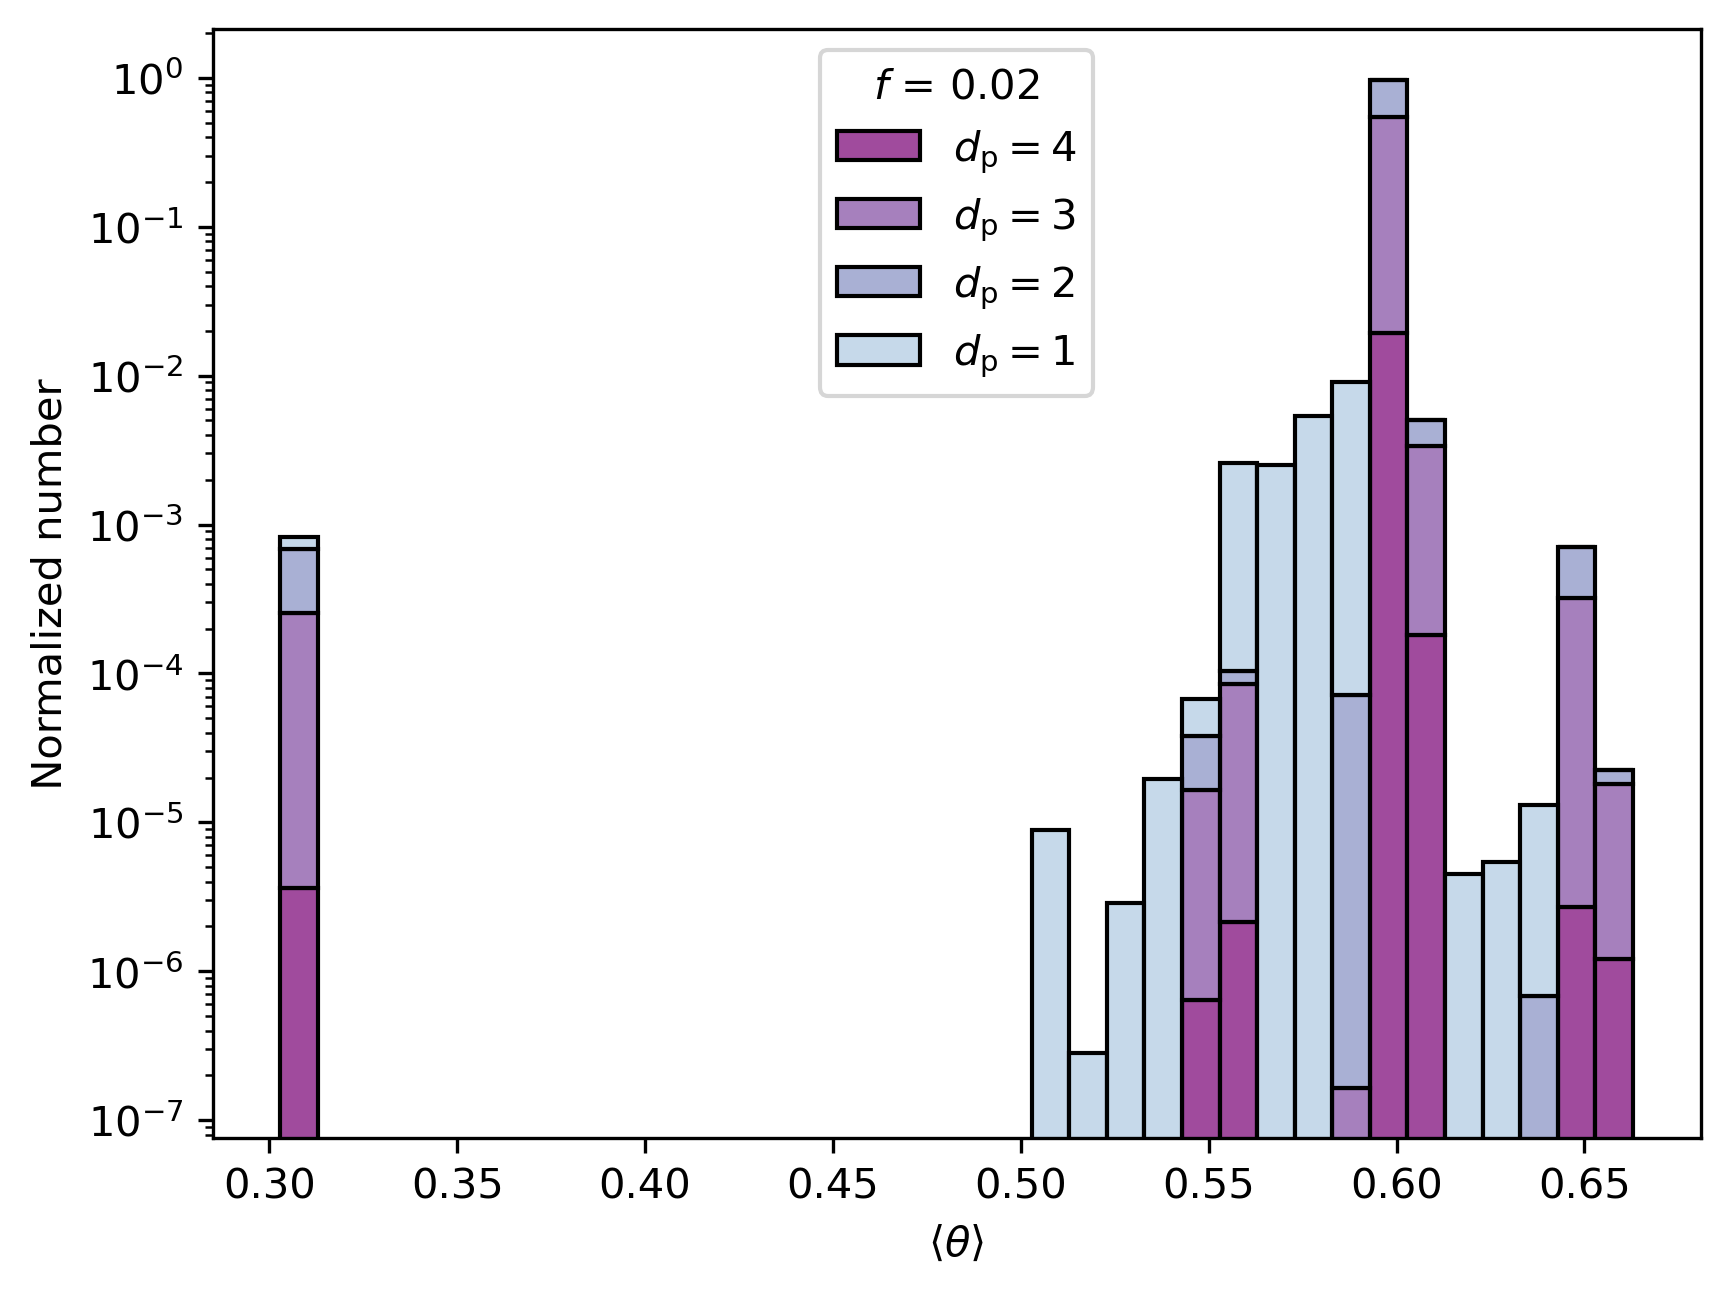

In [39]:
hist_plot(df_tot, 0.02, palette= ["#b3cde3", "#8c96c6", "#8856a7", "#810f7c"])
plt.legend(title=f'$f$ = {0.02}', loc='upper center', labels= ['$d_{\\rm p} = 4$', '$d_{\\rm p} = 3$', '$d_{\\rm p} = 2$', '$d_{\\rm p} = 1$',  'Dwell time interval'])
# plt.ylim(10**-5, 1)

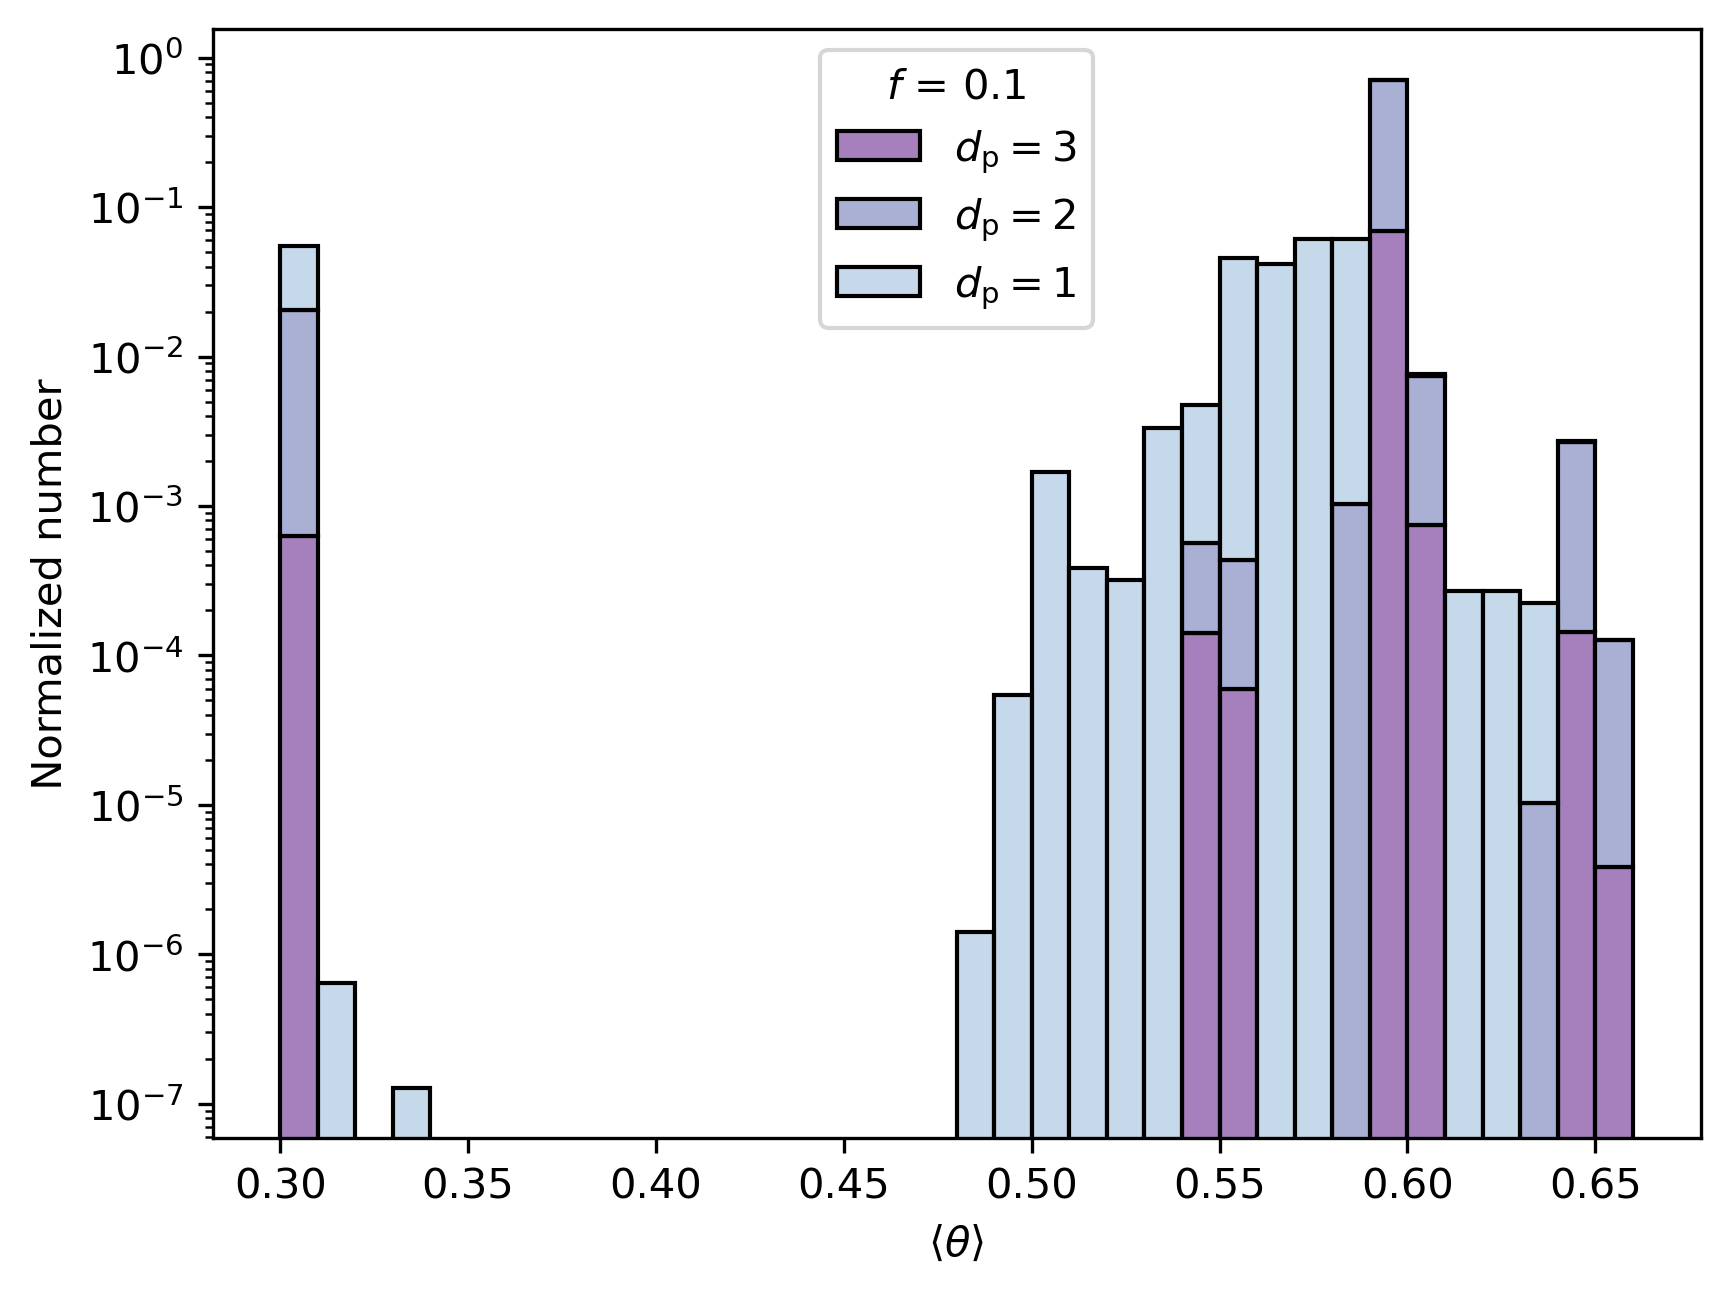

In [40]:
hist_plot(df_tot, 0.1, palette=["#b3cde3", "#8c96c6", "#8856a7"])
plt.legend(title=f'$f$ = {0.1}', loc='upper center', labels= [ '$d_{\\rm p} = 3$','$d_{\\rm p} = 2$', '$d_{\\rm p} = 1$', 'Dwell time interval'])


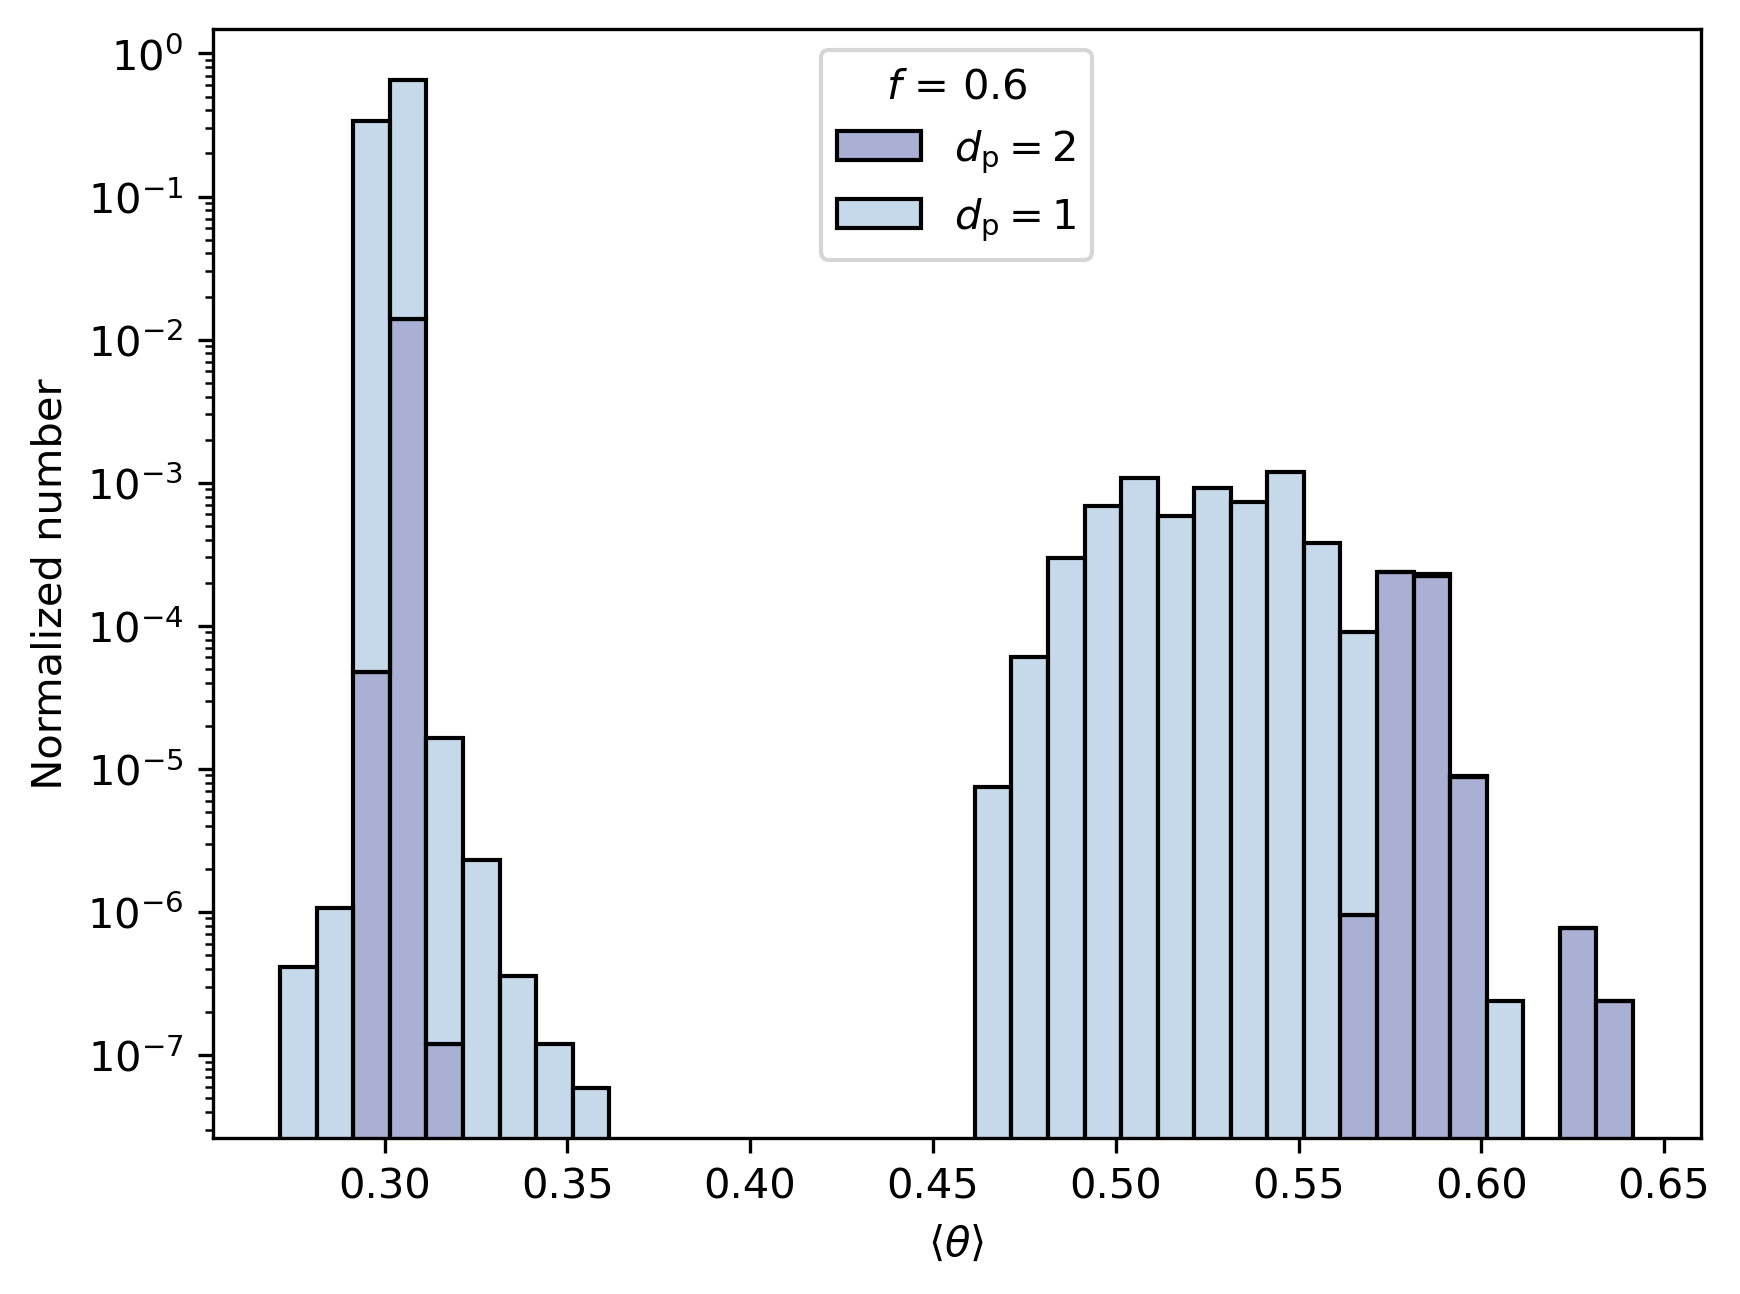

: 

In [44]:
hist_plot(df_tot, 0.6, ["#b3cde3", "#8c96c6"])

plt.legend(title=f'$f$ = {0.6}', loc='upper center', labels= [ '$d_{\\rm p} = 2$', '$d_{\\rm p} = 1$',  'Dwell time interval'])


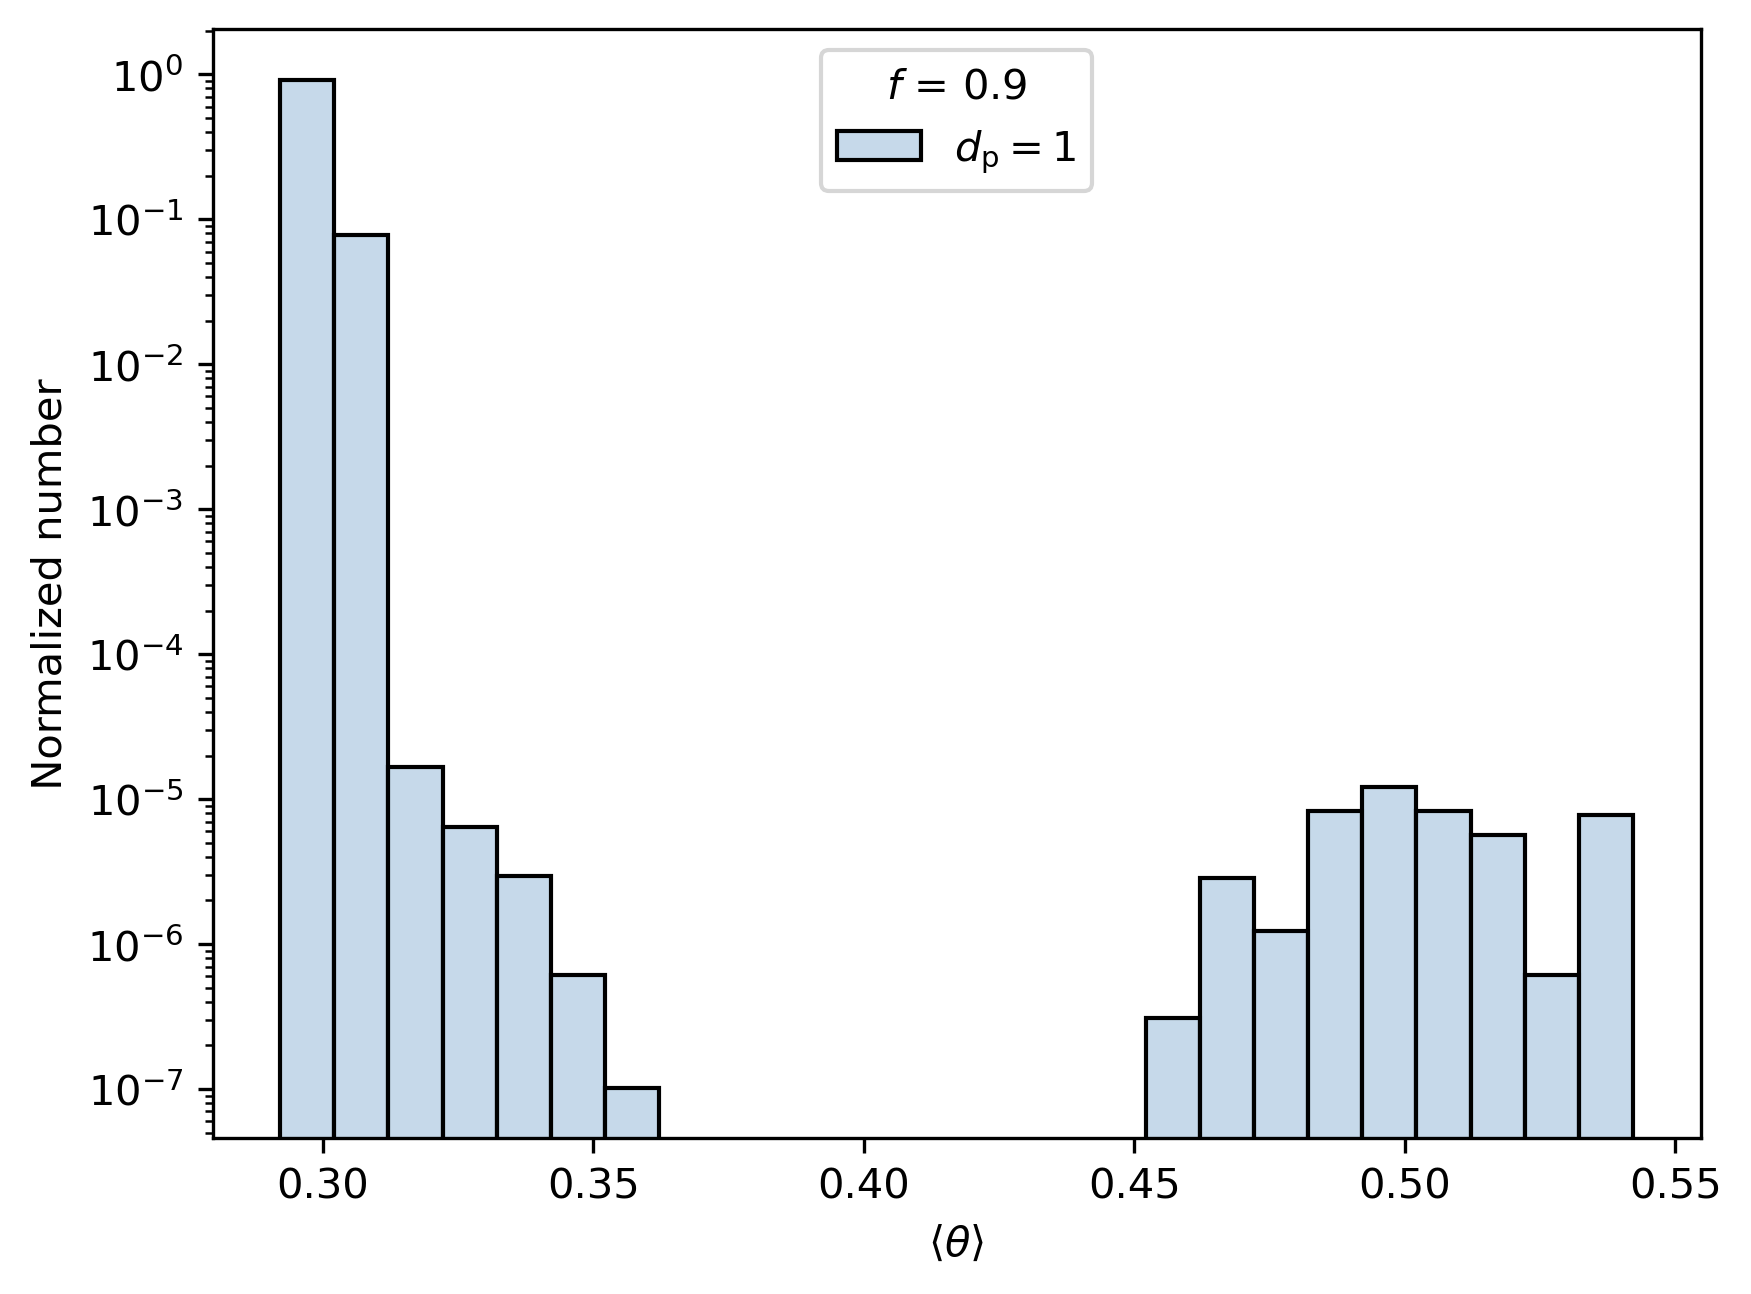

In [42]:
hist_plot(df_tot, 0.9, palette=["#b3cde3"])
plt.legend(title=f'$f$ = {0.9}', loc='upper center', labels= ['$d_{\\rm p} = 1$',  'Dwell time interval'])